# Grupo 3

**Participantes:**<br><br>
Daniel Moreira<br>
Lia Morimoto<br>
Ryan Ferreira<br>
Thiago Figueira

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)

In [ ]:
X.shape

(1797, 64)

In [ ]:
X[0].shape

(64,)

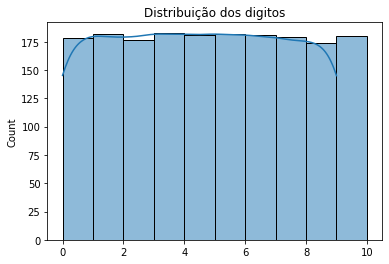

In [ ]:
plt.title('Distribuição dos digitos')
sns.histplot(y, kde=True, bins=np.linspace(0, 10, 11))

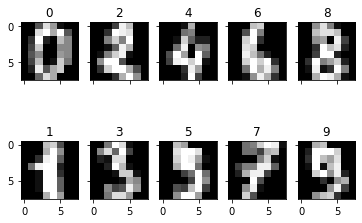

In [ ]:
fig, axs = plt.subplots(2, 5)
c = 0
for j in range(5):
  for i in range(2):
    plt.gray() 
    axs[i, j].imshow(X[c].reshape(8, 8))
    axs[i, j].set_title(f'{y[c]}')

    for ax in axs.flat:
        ax.label_outer()
    
    c+=1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

pca = PCA(random_state=42, n_components=32)
ica = FastICA(random_state=42, max_iter=8000)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca_train = X_train
pca_corr = pd.DataFrame(X_train).corr()

X_train = ica.fit_transform(X_train)
X_test = ica.transform(X_test)

In [ ]:
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.034553,0.003081,0.001539,0.006948,0.010180,-0.000589,0.017748,-0.012820,-0.006514,0.011325,-0.000812,0.000998,-0.000041,0.001237,-0.092561,-0.057081,0.003196,-0.000615,0.000752,-0.013502,-0.032397,0.026879,0.051217,-0.008701,0.030361,0.053967,0.008908,-0.004499,-0.002673,-0.041920,-0.003797,-0.004534
1,-0.007550,0.019833,-0.019171,0.003091,-0.001032,0.005832,-0.020165,-0.008720,0.045178,0.007213,-0.001639,-0.007370,0.008912,-0.005074,0.004473,-0.004220,0.001799,-0.000832,-0.001641,0.075256,0.019380,0.019642,0.021804,0.032792,-0.000077,-0.005593,-0.000027,-0.002299,-0.009542,-0.026441,-0.029100,0.000333
2,-0.002875,-0.017316,-0.162718,-0.003497,0.008055,-0.032090,-0.003479,-0.002464,-0.009996,0.015771,-0.032670,-0.059874,-0.009326,-0.005039,-0.011812,0.025931,0.001818,-0.001179,-0.001283,-0.008415,-0.012406,0.021203,0.005492,0.034415,-0.016725,0.009769,-0.109109,-0.002734,0.044092,0.020929,-0.016518,-0.000720
3,-0.010246,0.008289,0.010866,-0.008909,0.001306,0.023130,0.012177,0.003673,0.011348,-0.003015,-0.021373,0.013831,-0.001943,-0.003485,0.009272,0.013487,-0.001611,-0.000863,-0.016697,0.008413,0.005703,-0.062948,0.014955,-0.012764,0.001433,-0.003736,0.006109,0.005996,0.000841,-0.017722,-0.094847,0.000016
4,-0.011243,-0.088563,0.005900,0.009445,-0.025618,0.018874,-0.045448,-0.005085,0.006636,-0.004315,-0.023316,0.016989,-0.016960,-0.003555,0.003617,-0.015555,0.002667,-0.000393,-0.020207,0.003838,0.014114,-0.011983,0.017997,-0.002503,0.006395,-0.001220,0.003949,0.003311,-0.007090,-0.010599,-0.009611,-0.002497


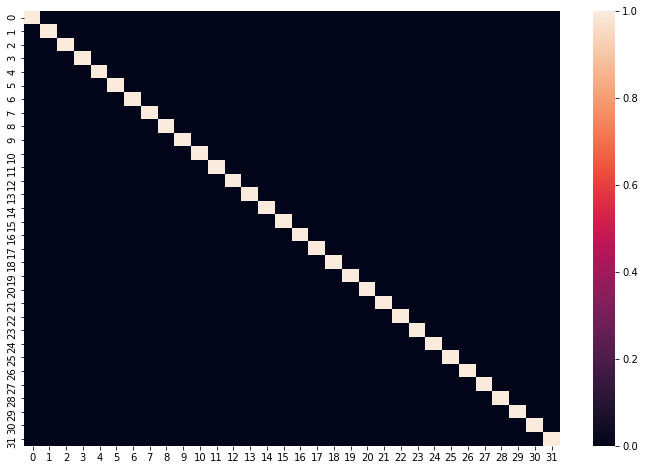

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(random_state=42, max_iter=2000)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(classification_report(y_test, pred))

print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      0.92      0.93        50
           2       0.94      0.98      0.96        47
           3       0.98      0.96      0.97        54
           4       0.95      1.00      0.98        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.96      0.98        55
           8       0.91      0.93      0.92        43
           9       0.96      0.93      0.95        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

0.9611111111111111


# Usando whiten:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
pca = PCA(random_state=42, n_components=32)
ica = FastICA(random_state=42, max_iter=20000, whiten=False, tol=0.01)
#O whiten False quer dizer que não quer aquela matriz com muita correlação na diagonal principal.
#O processo de whitenning é um processo onde correlações são anulados
# Ao desativá-lo isso quer dizer que o ICA vai apenas "rotacionar" os dados

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca_corr = pd.DataFrame(X_train).corr()

X_train = ica.fit_transform(X_train)
X_test = ica.transform(X_test)

df = pd.DataFrame(X_train)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.111071,-2.045404,1.511482,1.155465,2.316026,0.237128,-0.892299,0.971643,-0.354451,0.967257,0.372238,-0.140115,0.272292,-1.405841,0.363022,-0.470942,1.786707,-0.406222,-1.722642,-0.890283,-0.062013,-0.528574,-0.858276,0.905581,-1.180494,0.040375,0.767009,0.594032,1.576679,-0.874425,-0.176190,-2.270088
1,-0.300586,-1.958908,0.159660,-0.974397,-1.167197,-0.512872,0.182272,-0.341773,1.644865,-0.396754,1.137995,-1.093398,-0.819762,1.267984,1.078760,-0.787611,0.192067,0.398464,-1.367366,1.190544,0.690851,1.016590,-1.127521,0.214497,0.228390,-1.360141,-2.129374,0.059174,1.138637,-0.237880,-1.515430,1.448943
2,0.536489,1.920694,2.774074,-3.038076,0.122681,2.670481,1.541844,2.772012,0.927140,-1.934294,-0.294002,0.852435,1.284403,2.704015,-1.453364,0.858820,0.013722,-2.357834,1.829158,1.381883,-2.073250,-0.063006,-1.132204,-0.789055,0.045842,2.049776,2.229885,-4.033905,-0.850273,2.830954,-0.565947,-0.819816
3,1.169945,0.788718,-0.224141,-1.396017,0.800400,-0.127884,-0.665780,0.890317,1.127559,1.367520,0.359964,-1.421808,-0.345691,1.773420,-0.717832,0.797161,0.812528,-0.731756,-0.543854,-0.738128,1.759517,2.213661,2.119414,-1.428743,-0.018881,-1.598587,-2.231388,0.473675,-0.739610,0.251588,1.270889,1.294210
4,-0.840152,0.840457,0.159415,-0.500201,1.428182,0.326763,1.193255,0.862923,-1.865177,1.143316,1.042533,-1.847118,-1.560544,0.640910,-1.209504,0.257256,-0.211444,-1.095856,0.325905,-0.539395,-1.528922,1.821604,1.470336,-1.785633,1.212320,1.082515,0.834870,-0.625380,-1.820539,-0.207538,-0.669719,-1.196578


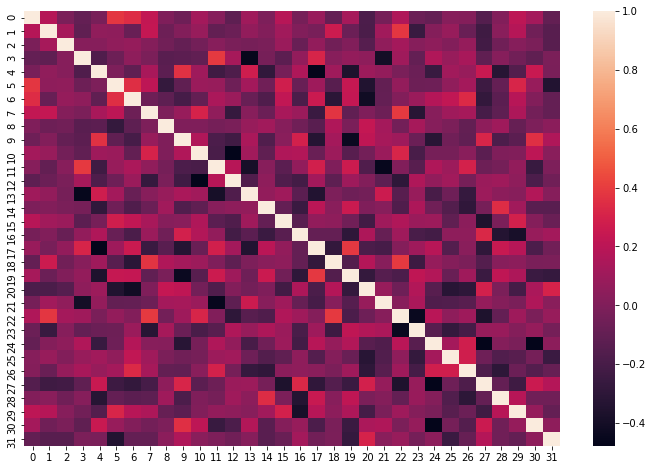

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(random_state=42, max_iter=2000)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(classification_report(y_test, pred))

print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       0.96      0.98      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      1.00      1.00        60
           5       0.96      0.98      0.97        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.95      0.92        43
           9       0.98      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.98      0.98      0.98       540

0.975925925925926
